In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score,r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import datetime
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score,roc_curve,f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score,confusion_matrix
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics 
%matplotlib inline

Here I am working on Machine Learning project called "Zomato Restaurant Rate Prediction". The objective of project is to predict Restaurant rating predicting by using user feedback, The basic approach was trying a different machine learning model and look for the one who is performing better on that data set. The restaurant reviews are very related to the project topic as reviews are made on websites and we can apply this model on such data sets to get the ratings.

Hey Connection!

I am happy to announce that my internship project got approved by iNeuron.ai
The main goal of this project is to perform extensive Exploratory Data Analysis(EDA) on the Zomato Dataset and build an appropriate Machine Learning Model that will help various Zomato Restaurants to predict their respective Ratings based on certain features.

Zomato is one of the best online food delivery apps which gives the users the ratings and the reviews on restaurants all over India. These ratings and the Reviews are considered as one of the most important deciding factors which determine how good a restaurant is. We will therefore use the real time Data set with various features a user would look into regarding a restaurant. We will be considering Bangalore City in this analysis. Content The basic idea of analysing the Zomato dataset is to get a fair idea about the factors affecting the establishment of different types of restaurants at different places in Bengaluru, aggregate rating of each restaurant, Bengaluru being one such city has more than 12,000 restaurants with restaurants serving dishes from all over the world. With each day new restaurants opening the industry hasn’t been saturated yet and the demand is increasing day by day. In spite of increasing demand it however has become difficult for new restaurants to compete with established restaurants. Most of them serving the same food. Bengaluru being an IT capital of India. Most of the people here are dependent mainly on the restaurant food as they don’t have time to cook for themselves.

Technology used-
 .  Python and flask as back-end.
 .  HTML and CSS for UI.
 .  Heroku for deployment.
 .  GitHub used for v #internship #machinelearning ersion control.



In [231]:
data=pd.read_csv("zomato.csv")

In [232]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [233]:
col_drop=["url","address","phone"]

In [234]:
data.drop(col_drop,axis=1,inplace=True)

In [235]:
data.shape

(51717, 14)

In [236]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   dish_liked                   23639 non-null  object
 8   cuisines                     51672 non-null  object
 9   approx_cost(for two people)  51371 non-null  object
 10  reviews_list                 51717 non-null  object
 11  menu_item                    51717 non-null  object
 12  listed_in(type)              51717 non-null  object
 13  listed_in(city)              51

In [237]:
data.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [238]:
data.isnull().sum()

name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [239]:
data.duplicated().sum()

63

## Droping the null and duplicate values

In [240]:
data.drop_duplicates(inplace=True)

In [241]:
data.duplicated().sum()

0

In [242]:
data.dropna(how="any",inplace=True)
data.isnull().sum()


name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [243]:
data.shape

(23395, 14)

In [244]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


## Renaming columes appropriately

In [245]:
data.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [246]:
data = data.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city'})
data.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

In [247]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


## Data cleaning

In [248]:
type(data.cost[0])

str

In [249]:
data.cost.value_counts()

400      2485
500      2323
600      2175
300      1694
800      1664
1,000    1242
700      1207
1,200     908
200       873
1,500     866
450       721
250       701
750       651
650       645
350       553
900       528
1,300     496
1,100     466
1,400     453
550       440
150       371
2,000     298
1,600     241
1,700     233
1,800     193
3,000     159
2,500     143
850       122
100       120
2,100      63
1,900      58
950        47
2,200      39
2,800      31
3,500      25
4,000      24
2,400      22
1,350      18
180        17
3,400      13
230        10
1,250       9
40          8
1,650       6
1,450       5
2,600       4
4,100       4
330         4
1,050       4
120         2
6,000       2
4,500       2
3,200       2
2,700       2
3,700       1
5,000       1
2,300       1
Name: cost, dtype: int64

In [250]:
data.cost=data.cost.apply(lambda x: x.replace(",",""))

In [251]:
data.cost=data.cost.astype(float)

In [252]:
type(data.cost[0])

numpy.float64

In [253]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23395 entries, 0 to 51715
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          23395 non-null  object 
 1   online_order  23395 non-null  object 
 2   book_table    23395 non-null  object 
 3   rate          23395 non-null  object 
 4   votes         23395 non-null  int64  
 5   location      23395 non-null  object 
 6   rest_type     23395 non-null  object 
 7   dish_liked    23395 non-null  object 
 8   cuisines      23395 non-null  object 
 9   cost          23395 non-null  float64
 10  reviews_list  23395 non-null  object 
 11  menu_item     23395 non-null  object 
 12  type          23395 non-null  object 
 13  city          23395 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 3.3+ MB


In [254]:
#Reading uninque values from the Rate column
data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', 'NEW', '2.4/5', '2.2/5', '2.3/5',
       '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5',
       '2.7 /5', '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5',
       '3.3 /5', '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5',
       '3.5 /5', '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [255]:
data.rate=data.rate.apply(lambda x: x.replace("/5",""))

In [256]:
data['rate'].unique()

array(['4.1', '3.8', '3.7', '4.6', '4.0', '4.2', '3.9', '3.0', '3.6',
       '2.8', '4.4', '3.1', '4.3', '2.6', '3.3', '3.5', '3.8 ', '3.2',
       '4.5', '2.5', '2.9', '3.4', '2.7', '4.7', 'NEW', '2.4', '2.2',
       '2.3', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '2.9 ', '2.7 ',
       '2.5 ', '2.6 ', '4.5 ', '4.3 ', '3.7 ', '4.4 ', '4.9', '2.1',
       '2.0', '1.8', '3.4 ', '3.6 ', '3.3 ', '4.6 ', '4.9 ', '3.2 ',
       '3.0 ', '2.8 ', '3.5 ', '3.1 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ',
       '2.1 ', '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [257]:
data.rate=data.rate.apply(lambda x: x.replace(" ",""))

In [258]:
## get rid of "NEW" and "-"

data=data[data.rate != "NEW"]

In [259]:
data=data[data.rate!="-"]

In [260]:
data['rate'].unique()

array(['4.1', '3.8', '3.7', '4.6', '4.0', '4.2', '3.9', '3.0', '3.6',
       '2.8', '4.4', '3.1', '4.3', '2.6', '3.3', '3.5', '3.2', '4.5',
       '2.5', '2.9', '3.4', '2.7', '4.7', '2.4', '2.2', '2.3', '4.8',
       '4.9', '2.1', '2.0', '1.8'], dtype=object)

In [261]:
data.rate=data.rate.astype(float)

In [262]:
data.rate.unique()

array([4.1, 3.8, 3.7, 4.6, 4. , 4.2, 3.9, 3. , 3.6, 2.8, 4.4, 3.1, 4.3,
       2.6, 3.3, 3.5, 3.2, 4.5, 2.5, 2.9, 3.4, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [263]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


## Visualisations
## Most famous restaurants chains in Bangaluru

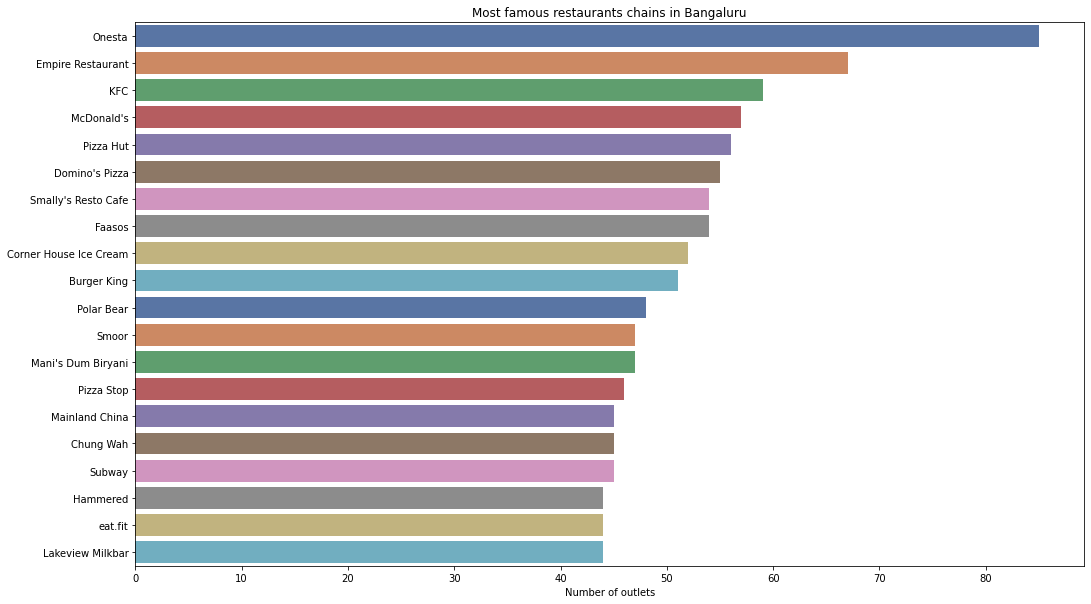

In [264]:
plt.figure(figsize=(17,10))
chains=data['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most famous restaurants chains in Bangaluru")
plt.xlabel("Number of outlets")
plt.show()

In [265]:
data['book_table'].value_counts()

No     17191
Yes     6057
Name: book_table, dtype: int64

([<matplotlib.patches.Wedge at 0x19b27dff850>,
 [Text(-0.7516441390674149, 0.8031382746486467, ''),
  Text(0.7516442142626435, -0.8031382042746401, '')])

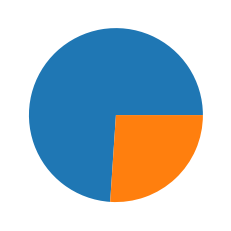

In [266]:
x=data['book_table'].value_counts()
colors = ['#800080', '#0000A0']
label=["No","Yes"]

plt.pie(x)


Insight

Most of the Restaurants do not offer table booking



## Whether Restaurants deliver online or Not

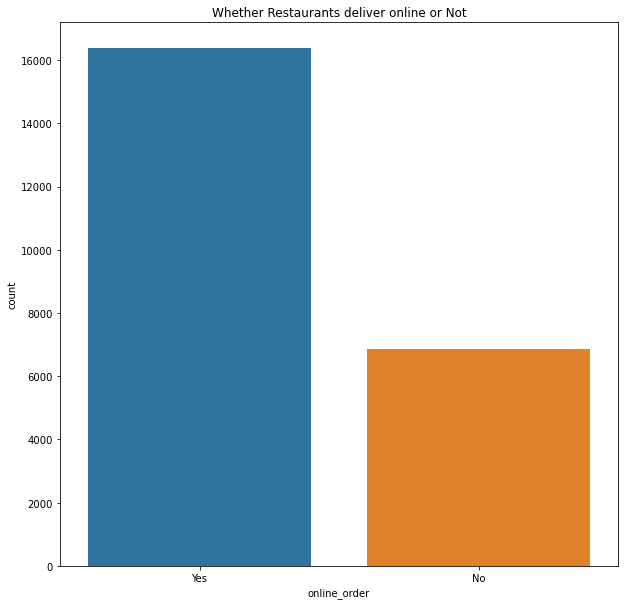

In [267]:
#Restaurants delivering Online or not
sns.countplot(data['online_order'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Whether Restaurants deliver online or Not')
plt.show()

Insight:

Most Restaurants offer option for online order and delivery

## Rating Distributions

<AxesSubplot:xlabel='rate', ylabel='Density'>

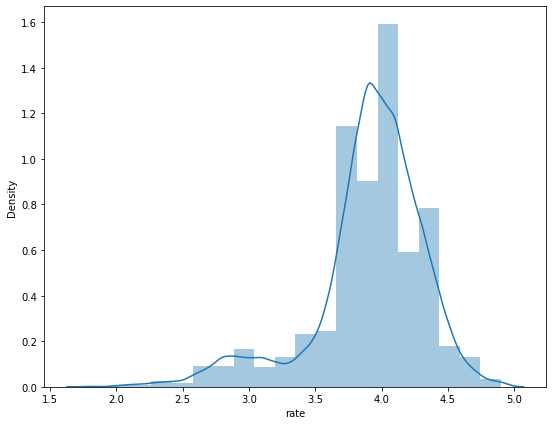

In [268]:
#How ratings are distributed
plt.figure(figsize=(9,7))

sns.distplot(data['rate'],bins=20)

## Services Types

Text(0.5, 1.0, 'Type of Service')

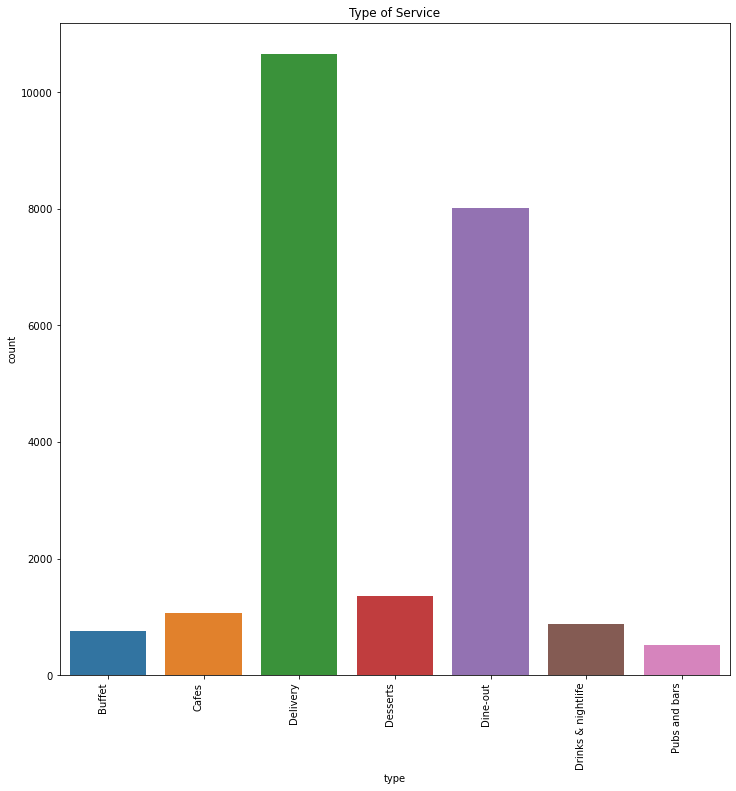

In [269]:
#Types of Services

sns.countplot(data['type']).set_xticklabels(sns.countplot(data['type']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.title('Type of Service')

Here the two main service types are Delivery and Dine-out



## Distribution of Cost of Food for two People

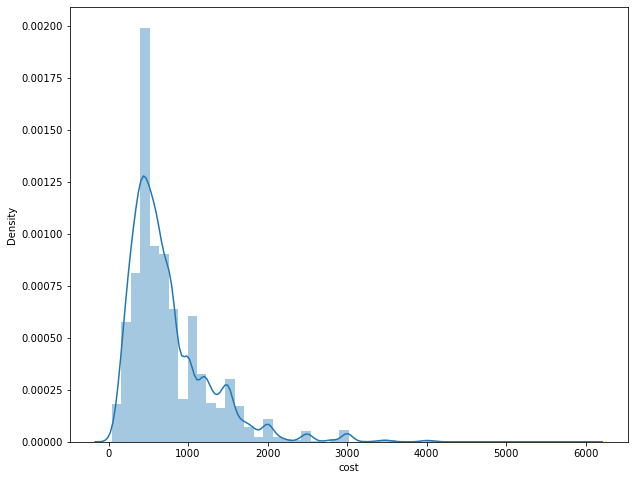

In [270]:
# Distribution of charges

plt.figure(figsize=(10,8))
sns.distplot(data['cost'])
plt.show()

## Most liked dishes

In [271]:
import re
data.index=range(data.shape[0])
likes=[]
for i in range(data.shape[0]):
    array_split=re.split(",",data["dish_liked"][i])
    for item in array_split:
        likes.append(item)

In [272]:
data.index

RangeIndex(start=0, stop=23248, step=1)

In [273]:
print("Count of Most liked dishes in Bangalore")
fav_food = pd.Series(likes).value_counts()
fav_food.head(30)

Count of Most liked dishes in Bangalore


 Pasta              2692
 Pizza              1915
 Cocktails          1880
 Burgers            1736
 Mocktails          1623
 Biryani            1307
 Sandwiches         1287
Burgers             1256
 Coffee             1184
 Nachos             1170
 Fish               1116
 Paratha            1107
 Salads             1055
 Chicken Biryani    1004
Cocktails            891
 Fries               876
 Noodles             854
 Beer                835
 Mutton Biryani      832
 Tea                 819
Coffee               801
 Sandwich            788
 Butter Chicken      782
 Thali               770
Biryani              749
Pizza                747
 Roti                729
 Brownie             726
 Salad               677
 Hot Chocolate       672
dtype: int64

(array([3.409e+03, 4.400e+01, 2.100e+01, 8.000e+00, 7.000e+00, 0.000e+00,
        3.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([1.0000e+00, 2.7010e+02, 5.3920e+02, 8.0830e+02, 1.0774e+03,
        1.3465e+03, 1.6156e+03, 1.8847e+03, 2.1538e+03, 2.4229e+03,
        2.6920e+03]),
 <BarContainer object of 10 artists>)

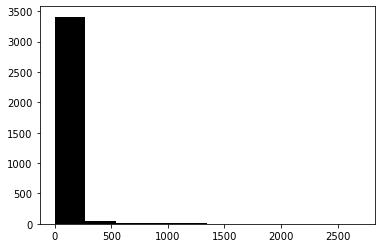

In [274]:
plt.hist(fav_food,bins=10,color="Black")

We can infer from the analysis that the 5 most liked dishes are Pasta,Pizza,Cocktails,Burgers,and Mocktails

## Restaurant and their counts


Text(0.5, 0, 'count')

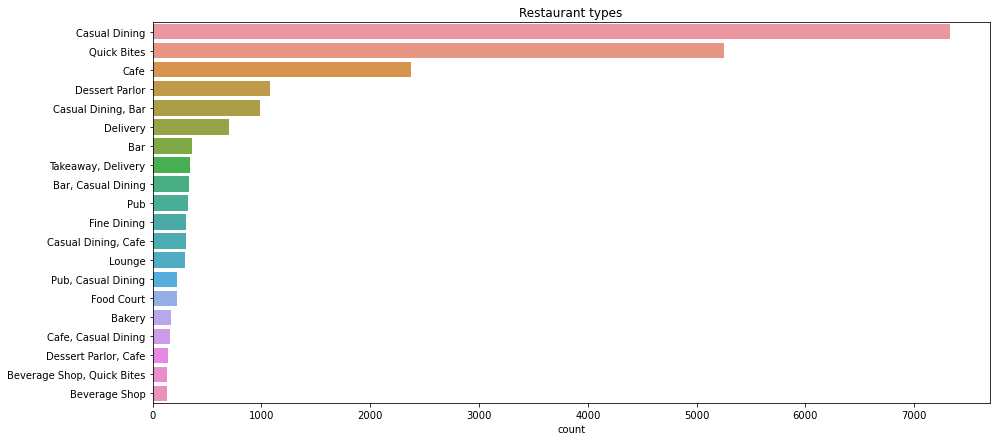

In [275]:
plt.figure(figsize=(15,7))
rst=data['rest_type'].value_counts()[:20]
sns.barplot(rst,rst.index)
plt.title("Restaurant types")
plt.xlabel("count")


Casual Dining, Quick Bites and Cafe are the 3 most common types of Restaurants in Banglore

In [276]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [277]:
def convert(x):
    if x=="Yes":
        return 1
    else:
        return 0

In [278]:
data.online_order=data.online_order.apply(convert)

In [279]:
data.book_table=data.book_table.apply(convert)

In [280]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [281]:
data.name.value_counts()

Onesta                                                                                                                                       85
Empire Restaurant                                                                                                                            67
KFC                                                                                                                                          59
McDonald's                                                                                                                                   57
Pizza Hut                                                                                                                                    56
                                                                                                                                             ..
Kolkata Biriyani                                                                                                                        

In [282]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23248 entries, 0 to 23247
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          23248 non-null  object 
 1   online_order  23248 non-null  int64  
 2   book_table    23248 non-null  int64  
 3   rate          23248 non-null  float64
 4   votes         23248 non-null  int64  
 5   location      23248 non-null  object 
 6   rest_type     23248 non-null  object 
 7   dish_liked    23248 non-null  object 
 8   cuisines      23248 non-null  object 
 9   cost          23248 non-null  float64
 10  reviews_list  23248 non-null  object 
 11  menu_item     23248 non-null  object 
 12  type          23248 non-null  object 
 13  city          23248 non-null  object 
dtypes: float64(2), int64(3), object(9)
memory usage: 2.5+ MB


In [283]:
data.location.value_counts()

Koramangala 5th Block    1776
BTM                      1472
Indiranagar              1355
HSR                      1170
Jayanagar                1060
                         ... 
Rajarajeshwari Nagar        2
West Bangalore              2
Magadi Road                 2
Yelahanka                   2
KR Puram                    1
Name: location, Length: 88, dtype: int64

In [284]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [285]:
data.location = enc.fit_transform(data.location)
data.rest_type = enc.fit_transform(data.rest_type)
data.cuisines = enc.fit_transform(data.cuisines)
data.menu_item = enc.fit_transform(data.menu_item)
data.name=enc.fit_transform(data.name)
data.type=enc.fit_transform(data.type)



In [286]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,1333,1,1,4.1,775,1,20,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",1386,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",5047,0,Banashankari
1,2502,1,0,4.1,787,1,20,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",594,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",5047,0,Banashankari
2,2322,1,0,3.8,918,1,16,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",484,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",5047,0,Banashankari
3,71,0,0,3.7,88,1,62,Masala Dosa,1587,300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",5047,0,Banashankari
4,1100,0,0,3.8,166,4,20,"Panipuri, Gol Gappe",1406,600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",5047,0,Banashankari


In [287]:
data.type.value_counts()

2    10657
4     8006
3     1364
1     1066
5      879
0      753
6      523
Name: type, dtype: int64

In [288]:
col=["dish_liked","reviews_list","city"]

In [289]:
data.drop(col,inplace=True,axis=1)

In [290]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,menu_item,type
0,1333,1,1,4.1,775,1,20,1386,800.0,5047,0
1,2502,1,0,4.1,787,1,20,594,800.0,5047,0
2,2322,1,0,3.8,918,1,16,484,800.0,5047,0
3,71,0,0,3.7,88,1,62,1587,300.0,5047,0
4,1100,0,0,3.8,166,4,20,1406,600.0,5047,0


In [291]:
#data[['name', 'online_order', 'book_table', 'votes', 'location', 'rest_type',
       'cuisines', 'cost', 'menu_item', 'type']]=sc.fit_transform(data[['name', 'online_order', 'book_table', 'votes', 'location', 'rest_type',
       'cuisines', 'cost', 'menu_item', 'type']])

IndentationError: unexpected indent (<ipython-input-291-6161c8f1aec6>, line 2)

In [292]:
data.drop("type",inplace=True,axis=1)

In [324]:
data.head(3700).to_csv("Zomato_data1.csv")

In [294]:
x=data.drop("rate",axis=1)
y=data.rate

In [295]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [296]:
x.columns

Index(['name', 'online_order', 'book_table', 'votes', 'location', 'rest_type',
       'cuisines', 'cost', 'menu_item'],
      dtype='object')

In [297]:
x[['name', 'online_order', 'book_table', 'votes', 'location', 'rest_type',
       'cuisines', 'cost', 'menu_item']]=sc.fit_transform(x[['name', 'online_order', 'book_table', 'votes', 'location', 'rest_type',
       'cuisines', 'cost', 'menu_item']])

In [298]:
x.head()

,name,online_order,book_table,votes,location,rest_type,cuisines,cost,menu_item
0,-0.261760,0.647661,1.684697,0.152232,-1.484306,-0.630710,1.106583,0.089342,0.530011
1,1.012294,0.647661,-0.593579,0.163007,-1.484306,-0.630710,-0.566221,0.089342,0.530011
2,0.816118,0.647661,-0.593579,0.280635,-1.484306,-0.825770,-0.798555,0.089342,0.530011
3,-1.637171,-1.544017,-0.593579,-0.464640,-1.484306,1.417419,1.531120,-0.871345,0.530011
4,-0.515699,-1.544017,-0.593579,-0.394602,-1.355332,-0.630710,1.148825,-0.294933,0.530011


In [299]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=10)

In [300]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()

In [301]:
lin_reg.fit(x_train,y_train)

LinearRegression()

In [302]:
y_pred_lin=lin_reg.predict(x_test)

In [303]:
def generate_pred(modelname,model,x_train,x_test,y_train,y_test):


    y_train_pred=lin_reg.predict(x_train)
    
    print("------Evaluation metrics for training data set--------")
    rmse_train=np.sqrt(mean_squared_error(y_train,y_train_pred))
    Rsqr_train=round(r2_score(y_train,y_train_pred)*100,2)
    print("modelname",modelname)
    print("rmse is",rmse_train)
    print("Rsqr is ",Rsqr_train)
    
    print("-------Evaluation metrics for test dataset--------")
    y_test_pred=lin_reg.predict(x_test)
    rmse_test=np.sqrt(mean_squared_error(y_test,y_test_pred))
    Rsqr_test=round(r2_score(y_test,y_test_pred)*100,2)
    print("modelname",modelname)
    print("rmse is",rmse_test)
    print("Rsqr is ",Rsqr_test)


In [304]:
generate_pred("linearRegression",lin_reg,x_train,x_test,y_train,y_test)

------Evaluation metrics for training data set--------
modelname linearRegression
rmse is 0.3747603622659842
Rsqr is  22.5
-------Evaluation metrics for test dataset--------
modelname linearRegression
rmse is 0.375280421713015
Rsqr is  22.83


In [305]:
RF=RandomForestRegressor(random_state=100)

In [306]:
RF.fit(x_train,y_train)

RandomForestRegressor(random_state=100)

In [307]:
def generate_pred_rf(modelname,model,x_train,x_test,y_train,y_test):
    RF=RandomForestRegressor(random_state=100)
    RF.fit(x_train,y_train)
    

    y_train_pred=RF.predict(x_train)
    
    print("------Evaluation metrics for training data set--------")
    rmse_train=np.sqrt(mean_squared_error(y_train,y_train_pred))
    Rsqr_train=round(r2_score(y_train,y_train_pred)*100,2)
    print("modelname-",modelname)
    print("rmse is",rmse_train)
    print("Rsqr is ",Rsqr_train)
    
    print("-------Evaluation metrics for test dataset--------")
    y_test_pred=RF.predict(x_test)
    rmse_test=np.sqrt(mean_squared_error(y_test,y_test_pred))
    Rsqr_test=round(r2_score(y_test,y_test_pred)*100,2)
    print("modelname-",modelname)
    print("rmse is",rmse_test)
    print("Rsqr is ",Rsqr_test)
    result=model.score(x_test,y_test)
    print(result)


In [308]:
generate_pred_rf("RF",RF,x_train,x_test,y_train,y_test)

------Evaluation metrics for training data set--------
modelname- RF
rmse is 0.04797225021416864
Rsqr is  98.73
-------Evaluation metrics for test dataset--------
modelname- RF
rmse is 0.12114104736607456
Rsqr is  91.96
0.9195835538781686


In [227]:
# Number of trees in random forest
n_estimators = [100,150,200]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,5,10,15]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
# bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}


In [232]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator=RF,param_grid=random_grid,cv=5)

In [233]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=100),
             param_grid={'max_depth': [2, 5, 10, 15],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 15],
                         'n_estimators': [100, 150, 200]})

In [234]:
grid_search.best_score_

0.8330396290298099

## We got less accuracy after hyperparameter tuning.

In [309]:
#Preparing Extra Tree Regression
from sklearn.ensemble import  ExtraTreesRegressor
ET_Model=ExtraTreesRegressor(n_estimators = 120)
ET_Model.fit(x_train,y_train)
#y_predict=ET_Model.predict(x_test)


def generate_pred_etr(modelname,model,x_train,x_test,y_train,y_test):

    ET_Model=ExtraTreesRegressor(n_estimators = 120)
    ET_Model.fit(x_train,y_train)
    y_train_pred=ET_Model.predict(x_train)
    
    print("------Evaluation metrics for training data set--------")
    rmse_train=np.sqrt(mean_squared_error(y_train,y_train_pred))
    Rsqr_train=round(r2_score(y_train,y_train_pred)*100,2)
    print("modelname-",modelname)
    print("rmse is",rmse_train)
    print("Rsqr is ",Rsqr_train)
    
    print("-------Evaluation metrics for test dataset--------")
    y_test_pred=ET_Model.predict(x_test)
    rmse_test=np.sqrt(mean_squared_error(y_test,y_test_pred))
    Rsqr_test=round(r2_score(y_test,y_test_pred)*100,2)
    print("modelname-",modelname)
    print("rmse is",rmse_test)
    print("Rsqr is ",Rsqr_test)

In [310]:
generate_pred_etr("Extraa tree regressor",ET_Model,x_train,x_test,y_train,y_test)

------Evaluation metrics for training data set--------
modelname- Extraa tree regressor
rmse is 0.006528961158958676
Rsqr is  99.98
-------Evaluation metrics for test dataset--------
modelname- Extraa tree regressor
rmse is 0.10415225242391436
Rsqr is  94.06


In [103]:
n_estimators = [100,150,200]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,5,10,15]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
# bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}


In [104]:
from sklearn.model_selection import GridSearchCV
gsc = GridSearchCV(
    estimator=ET_Model,
    param_grid=random_grid,
    scoring='r2',
    cv=5
)

In [323]:
#gsc.fit(x_train,y_train)

## After hyperparameter tuning we got less less accuracy than parameters in extraa tree regressor.


In [311]:
DT=DecisionTreeRegressor(random_state=100)

In [312]:
DT.fit(x_train,y_train)

DecisionTreeRegressor(random_state=100)

In [313]:
def generate_pred_dt(modelname,model,x_train,x_test,y_train,y_test):

    DT=DecisionTreeRegressor(random_state=100)
    DT.fit(x_train,y_train)
    
    y_train_pred=DT.predict(x_train)
    
    print("------Evaluation metrics for training data set--------")
    rmse_train=np.sqrt(mean_squared_error(y_train,y_train_pred))
    Rsqr_train=round(r2_score(y_train,y_train_pred)*100,2)
    print("modelname-",modelname)
    print("rmse is",rmse_train)
    print("Rsqr is ",Rsqr_train)
    
    print("-------Evaluation metrics for test dataset--------")
    y_test_pred=DT.predict(x_test)
    rmse_test=np.sqrt(mean_squared_error(y_test,y_test_pred))
    Rsqr_test=round(r2_score(y_test,y_test_pred)*100,2)
    print("modelname-",modelname)
    print("rmse is",rmse_test)
    print("Rsqr is ",Rsqr_test)


In [314]:
generate_pred_dt("DT",DT,x_train,x_test,y_train,y_test)

------Evaluation metrics for training data set--------
modelname- DT
rmse is 0.006528961158958676
Rsqr is  99.98
-------Evaluation metrics for test dataset--------
modelname- DT
rmse is 0.14768585479702548
Rsqr is  88.05


In [315]:
KNN=KNeighborsRegressor()

In [316]:
KNN.fit(x_train,y_train)

KNeighborsRegressor()

In [317]:
def generate_pred_knn(modelname,model,x_train,x_test,y_train,y_test):
    KNN=KNeighborsRegressor()
    KNN.fit(x_train,y_train)
    


    y_train_pred=KNN.predict(x_train)
    
    print("------Evaluation metrics for training data set--------")
    rmse_train=np.sqrt(mean_squared_error(y_train,y_train_pred))
    Rsqr_train=round(r2_score(y_train,y_train_pred)*100,2)
    print("modelname-",modelname)
    print("rmse is",rmse_train)
    print("Rsqr is ",Rsqr_train)
    
    print("-------Evaluation metrics for test dataset--------")
    y_test_pred=KNN.predict(x_test)
    rmse_test=np.sqrt(mean_squared_error(y_test,y_test_pred))
    Rsqr_test=round(r2_score(y_test,y_test_pred)*100,2)
    print("modelname-",modelname)
    print("rmse is",rmse_test)
    print("Rsqr is ",Rsqr_test)


In [318]:
generate_pred_knn("KNN",KNN,x_train,x_test,y_train,y_test)

------Evaluation metrics for training data set--------
modelname- KNN
rmse is 0.2083126547020486
Rsqr is  76.05
-------Evaluation metrics for test dataset--------
modelname- KNN
rmse is 0.2691846709914481
Rsqr is  60.29


In [319]:
svr=SVR()

In [320]:
svr.fit(x_train,y_train)

SVR()

In [321]:
def generate_pred_svr(modelname,model,x_train,x_test,y_train,y_test):
    svr=SVR()
    svr.fit(x_train,y_train)
    y_train_pred=svr.predict(x_train)
    
    print("------Evaluation metrics for training data set--------")
    rmse_train=np.sqrt(mean_squared_error(y_train,y_train_pred))
    Rsqr_train=round(r2_score(y_train,y_train_pred)*100,2)
    print("modelname-",modelname)
    print("rmse is",rmse_train)
    print("Rsqr is ",Rsqr_train)
    
    print("-------Evaluation metrics for test dataset--------")
    y_test_pred=svr.predict(x_test)
    rmse_test=np.sqrt(mean_squared_error(y_test,y_test_pred))
    Rsqr_test=round(r2_score(y_test,y_test_pred)*100,2)
    print("modelname-",modelname)
    print("rmse is",rmse_test)
    print("Rsqr is ",Rsqr_test)
    

In [322]:
generate_pred_svr("SVR",svr,x_train,x_test,y_train,y_test)

------Evaluation metrics for training data set--------
modelname- SVR
rmse is 0.3340270114242458
Rsqr is  38.43
-------Evaluation metrics for test dataset--------
modelname- SVR
rmse is 0.34065917386923994
Rsqr is  36.41


## using randomsearchCV

In [247]:
n_estimators = [100, 120, 140,150,200]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth =  [2,10, 20, 30, None]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [249]:
from sklearn.model_selection import RandomizedSearchCV

In [250]:
rf = RandomForestRegressor(random_state=42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 55, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [251]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 55 candidates, totalling 275 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=55, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 10, 20, 30, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 120, 140, 150,
                                                         200]},
                   random_state=42, verbose=2)

In [252]:
rf_random.best_score_

0.8958566280255434

In [253]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(random_state=0, n_estimators=100,base_estimator=DecisionTreeRegressor)

In [254]:
def generate_pred_ada(modelname,model,x_train,x_test,y_train,y_test):
    ada = AdaBoostRegressor(random_state=0, n_estimators=100)
    ada.fit(x_train,y_train)
    

    y_train_pred=ada.predict(x_train)
    
    print("------Evaluation metrics for training data set--------")
    rmse_train=np.sqrt(mean_squared_error(y_train,y_train_pred))
    Rsqr_train=round(r2_score(y_train,y_train_pred)*100,2)
    print("modelname-",modelname)
    print("rmse is",rmse_train)
    print("Rsqr is ",Rsqr_train)
    
    print("-------Evaluation metrics for test dataset--------")
    y_test_pred=ada.predict(x_test)
    rmse_test=np.sqrt(mean_squared_error(y_test,y_test_pred))
    Rsqr_test=round(r2_score(y_test,y_test_pred)*100,2)
    print("modelname-",modelname)
    print("rmse is",rmse_test)
    print("Rsqr is ",Rsqr_test)
    result=model.score(x_test,y_test)
    print(result)


In [255]:
generate_pred_ada("Adaboost",ada,x_train,x_test,y_train,y_test)

------Evaluation metrics for training data set--------
modelname- Adaboost
rmse is 0.426044746760614
Rsqr is  -0.17
-------Evaluation metrics for test dataset--------
modelname- Adaboost
rmse is 0.42931534910528785
Rsqr is  -1.0


NotFittedError: This AdaBoostRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [256]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()

In [257]:
def generate_pred_gdb(modelname,model,x_train,x_test,y_train,y_test):
    gbr=GradientBoostingRegressor()
    gbr.fit(x_train,y_train)

    y_train_pred=gbr.predict(x_train)
    
    print("------Evaluation metrics for training data set--------")
    rmse_train=np.sqrt(mean_squared_error(y_train,y_train_pred))
    Rsqr_train=round(r2_score(y_train,y_train_pred)*100,2)
    print("modelname-",modelname)
    print("rmse is",rmse_train)
    print("Rsqr is ",Rsqr_train)
    
    print("-------Evaluation metrics for test dataset--------")
    y_test_pred=gbr.predict(x_test)
    rmse_test=np.sqrt(mean_squared_error(y_test,y_test_pred))
    Rsqr_test=round(r2_score(y_test,y_test_pred)*100,2)
    print("modelname-",modelname)
    print("rmse is",rmse_test)
    print("Rsqr is ",Rsqr_test)
    result=model.score(x_test,y_test)
    print(result)


In [258]:
generate_pred_gdb("Gradiantboosting",gbr,x_train,x_test,y_train,y_test)

------Evaluation metrics for training data set--------
modelname- Gradiantboosting
rmse is 0.3130724357141426
Rsqr is  45.91
-------Evaluation metrics for test dataset--------
modelname- Gradiantboosting
rmse is 0.3185801033406733
Rsqr is  44.38


NotFittedError: This GradientBoostingRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [259]:
from xgboost import XGBRegressor
xg=XGBRegressor()

In [260]:
def generate_pred_xg(modelname,model,x_train,x_test,y_train,y_test):
    xg=XGBRegressor()
    xg.fit(x_train,y_train)

    y_train_pred=xg.predict(x_train)
    
    print("------Evaluation metrics for training data set--------")
    rmse_train=np.sqrt(mean_squared_error(y_train,y_train_pred))
    Rsqr_train=round(r2_score(y_train,y_train_pred)*100,2)
    print("modelname-",modelname)
    print("rmse is",rmse_train)
    print("Rsqr is ",Rsqr_train)
    
    print("-------Evaluation metrics for test dataset--------")
    y_test_pred=xg.predict(x_test)
    rmse_test=np.sqrt(mean_squared_error(y_test,y_test_pred))
    Rsqr_test=round(r2_score(y_test,y_test_pred)*100,2)
    print("modelname-",modelname)
    print("rmse is",rmse_test)
    print("Rsqr is ",Rsqr_test)
    result=model.score(x_test,y_test)
    print(result)


In [261]:
generate_pred_xg("xgboost",xg,x_train,x_test,y_train,y_test)

------Evaluation metrics for training data set--------
modelname- xgboost
rmse is 0.14686219389281185
Rsqr is  88.1
-------Evaluation metrics for test dataset--------
modelname- xgboost
rmse is 0.18251248267134854
Rsqr is  81.75


NotFittedError: need to call fit or load_model beforehand

In [2]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv('zomato.csv')

#df.drop('Unnamed: 0',axis=1,inplace=True)
print(df.head())
x=df.drop('rate',axis=1)
y=df['rate']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=10)


#Preparing Extra Tree Regression
from sklearn.ensemble import  RandomForestRegressor
ET_Model=RandomForestRegressor(random_state=100)
ET_Model.fit(x_train,y_train)


y_predict=ET_Model.predict(x_test)

import pickle
# # Saving model to disk
pickle.dump(ET_Model, open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))
print(y_predict)




                                                 url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5  

ValueError: could not convert string to float: 'https://www.zomato.com/bangalore/rustic-treats-jayanagar?context=eyJzZSI6eyJlIjpbIjE4NzI0NTQ3IiwiMTg3MjU1NTMiLCIxODkwODg4OCIsIjE4OTM0NzE4IiwxODU5OTU0OCwiNTkwMDgiLCI2MTQwOCIsIjE4OTY1MDg0IiwiMTg2NjgwODMiLCIxODc4MjYzNiIsIjE4MTczMDY0IiwiMTg1OTM0NTEiLCIxODU3OTkxNiIsIjE4NjAzNDc0IiwiMTg0NzY0NDgiLCIxODYxNzgxNyIsIjUxMjI3IiwiNjA0MDkiXSwidCI6IkRlbGl2ZXJ5IFJlc3RhdXJhbnRzIGluIEJhc2F2YW5hZ3VkaSJ9fQ=='